 **NLP-Projct** Sentiment Analysis in Twitter 





**Nom** : Belkhoumali + Doudou 

**prénom** : Ahmed Abdelmounaim + Smail


**spécialité** : Data science & IA

In [ ]:
! pip install emoji

In [ ]:

!pip install vaderSentiment

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import emoji
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer

# Authentication

In [ ]:
key=pd.read_csv('/content/twitter Key - Feuille 1.csv')

In [ ]:
consumerKey =key['API Key'][0]
consumerSecret =key['API Key Secret'][0]
accessToken = key['Access Token'][0]
accessTokenSecret = key['Access Token Secret'][0]

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Getting Tweets With Keyword 

In [ ]:
#keyword = input("Please enter keyword or hashtag to search: ")
#noOfTweet = int(input ("Please enter how many tweets to analyze:"))

In [ ]:

def get_tweets(keyword:str,noOfTweet:int):
  all_tweets=tweepy.Cursor(api.search, q=keyword,tweet_mode='extended',lang='en', wait_on_rate_limit=True).items(noOfTweet)

  tweet_list = []
  for tweet in all_tweets:
    tweet_list.append(tweet.full_text)

  tweet_df=pd.DataFrame(tweet_list,columns=['Tweet'])
  return tweet_df

In [ ]:
tweet_df=get_tweets('vaccine',1000)

In [ ]:
tweet_df

,Tweet
0,RT @RepThomasMassie: The DC vaccine mandate ki...
1,@TOShitgibbon @faridghalili No they just ruled...
2,RT @augyog: Niggas just dey the ghana inside. ...
3,Interesting note about the covid vaccines. mRN...
4,RT @MarshaBlackburn: COVID vaccine mandates ar...
...,...
995,RT @NormOrnstein: What have we learned about J...
996,RT @shefalil: “It’s not just you getting COVID...
997,RT @NBSaphierMD: Hospitals are telling vaccina...
998,RT @DrStephanieCoo1: Did our premier just say ...


# Cleaning

In [ ]:
def clean_tweets(text):
  text=re.sub(r'@[A-Za-z0–9]+','',text) #remove @mentions
  text=re.sub(r'#','',text) #remove #
  text=re.sub(r'RT[\s]+','',text) # remove RT
  text=re.sub(r'https?:\/\/\S+','',text) #remove URL 
  text=re.sub(emoji.get_emoji_regexp(),r'',text) #remove emojies
  #text= ''.join([i for i in text if not i.isdigit()])
  text = re.sub('[()!?]', ' ', text) #remove punctuations
  text = re.sub('\[.*?\]',' ', text)  #remove punctuations
  text = re.sub("[^a-z0-9]"," ", text)
  return text

In [ ]:
tweet_df.Tweet=tweet_df.Tweet.apply(clean_tweets)

# Analyse des sentiment 

In [ ]:
tweet_df[['polarity', 'subjectivity']] = tweet_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
analyzer=SentimentIntensityAnalyzer()

for index,row in tweet_df['Tweet'].iteritems():
  score=analyzer.polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg > pos:
    tweet_df.loc[index, 'sentiment'] ='negative'
  elif pos > neg:
    tweet_df.loc[index, 'sentiment'] = 'positive'
  else:
    tweet_df.loc[index, 'sentiment'] ='neutral'
  tweet_df.loc[index, 'neg'] = neg
  tweet_df.loc[index, 'neu'] = neu
  tweet_df.loc[index, 'pos'] = pos


In [ ]:
tweet_df

,Tweet,polarity,subjectivity,sentiment,neg,neu,pos
0,he vaccine mandate kicks in this weekend...,0.000000,0.000000,neutral,0.000,1.000,0.000
1,o they just ruled iden is not king amp ...,-0.020000,0.620000,positive,0.067,0.856,0.076
2,iggas just dey the ghana inside o ghana c...,0.000000,0.000000,negative,0.181,0.741,0.078
3,nteresting note about the covid vaccines m ...,0.288889,0.433333,neutral,0.000,1.000,0.000
4,vaccine mandates are illegal,-0.500000,0.500000,negative,0.545,0.455,0.000
...,...,...,...,...,...,...,...
995,hat have we learned about ustice my oney...,0.000000,0.000000,neutral,0.000,1.000,0.000
996,t s not just you getting t s you s...,0.000000,0.000000,positive,0.000,0.917,0.083
997,ospitals are telling vaccinated workers w ...,-0.050000,0.400000,neutral,0.000,1.000,0.000
998,1 id our premier just say obesity drunk dri...,-0.500000,1.000000,negative,0.118,0.882,0.000


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
pc=count_values_in_column(tweet_df,'sentiment')

In [ ]:
pc

,Total,Percentage
negative,411,41.1
neutral,297,29.7
positive,292,29.2


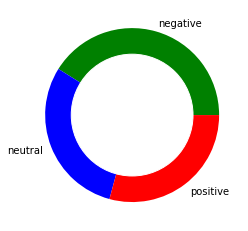

In [ ]:

names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<function matplotlib.pyplot.show>

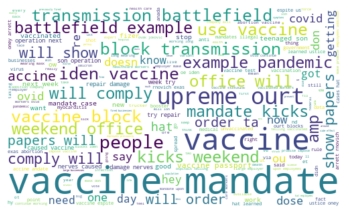

In [ ]:

all_word=''.join(word for word in tweet_df['Tweet'])
wordCloud=WordCloud(background_color='white',width=500,height=300,random_state=21,max_font_size=120).generate(all_word)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show